In [1]:
import re   #regular expressions 
import nltk #for text manipulation
import string 
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
train  = pd.read_csv('train_E6oV3lV.csv') 
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
train[train['label']==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


In [4]:
train.shape , test.shape

((31962, 3), (17197, 2))

In [5]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

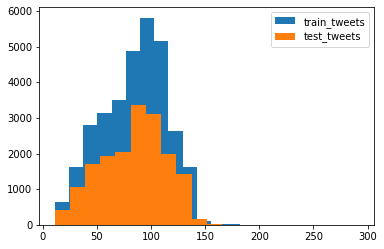

In [6]:
len_train=train['tweet'].str.len()
len_test=test['tweet'].str.len()
plt.hist(len_train,bins=20,label='train_tweets')
plt.hist(len_test,bins=20,label='test_tweets')
plt.legend()
plt.show()

In [7]:
combi=train.append(test,ignore_index=True,sort=True)
combi.shape

(49159, 3)

In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt          

In [9]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [10]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace('[^a-zA-Z#]',' ')
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [11]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [12]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [13]:
#Stemmig the words for less number of words without loosing information 
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])
tokenized_tweet

0                                                                [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1                                                 [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                                                                           [bihday, your, majesti]
3                                                                                                  [#model, love, take, with, time]
4                                                                                                      [factsguid, societi, #motiv]
5                                           [huge, fare, talk, befor, they, leav, chao, disput, when, they, there, #allshowandnogo]
6                                                                                                           [camp, tomorrow, danni]
7        [next, school, year, year, exam, think, about, that, #school, #exam

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [15]:
all_words = ' '.join([text for text in combi['tidy_tweet']])

In [16]:
#Collecting the hashtags as features
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht = re.findall(r"#(\w+)", i) 
        hashtags.append(ht) 
    return hashtags

#extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 

#extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

In [17]:
#Unnesting the list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

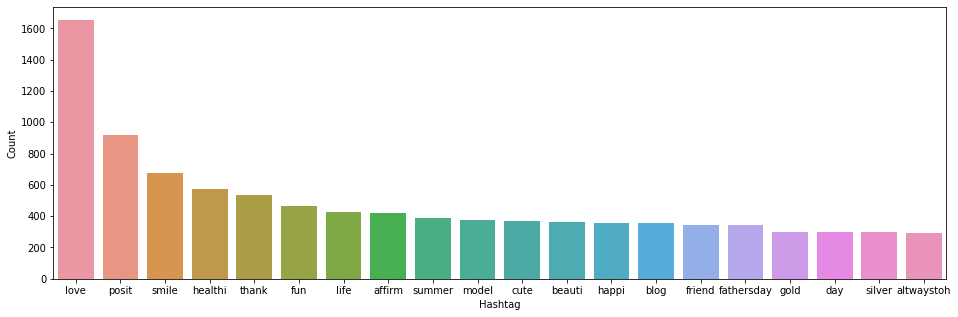

In [18]:
#plotting the top hashtags
#for positive tweets
a = nltk.FreqDist(HT_regular) #returns dictionary with counts of each tweet
df = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
df = df.nlargest(columns="Count", n = 20) #Taking the top 20 hashtags

plt.figure(figsize=(16,5)) 
ax = sns.barplot( x= "Hashtag", y = "Count", data=df )
ax.set(ylabel = 'Count')
plt.show()

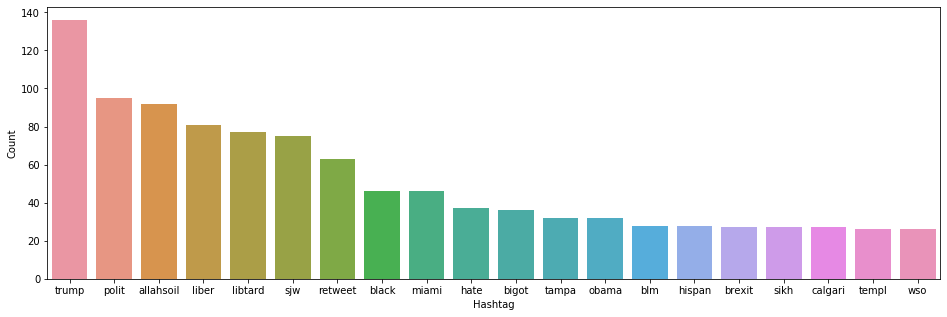

In [19]:
#for negative tweets
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
e = e.nlargest(columns="Count", n = 20) #taking 20 from top
plt.figure(figsize=(16,5))
sns.barplot(data=e, x= "Hashtag", y = "Count")
plt.show()

In [20]:
# Bag of words 
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.9 ,min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [21]:
# Generating our own word vectors with skip gram model which can have two vectors for one word apple(fruit,company)
# Using gensim
import gensim

unable to import 'smart_open.gcs', disabling that module


In [22]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # Tokenizing
model_w2v = gensim.models.Word2Vec(tokenized_tweet, size=200, window=5, min_count=2, sg=1, hs=1, negative=10, workers=2, seed=34)
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6510028, 7536020)

In [23]:
# Checking the vector representation
model_w2v['food']
len(model_w2v['food']) 

200

In [24]:
model_w2v.wv.most_similar(positive="dinner") # Checking the performance of model

[('noodl', 0.4413357973098755),
 ('#bihdaydinn', 0.43813639879226685),
 ('cookout', 0.43442249298095703),
 ('#biall', 0.424666166305542),
 ('canni', 0.4239192605018616),
 ('#dnd', 0.41196978092193604),
 ('spaghetti', 0.41147443652153015),
 ('dess', 0.4114638566970825),
 ('#foodcoma', 0.40495574474334717),
 ('burrito', 0.3999250531196594)]

In [25]:
model_w2v.wv.most_similar(positive="trump") # Checking the performance of model

[('tomlin', 0.5637615919113159),
 ('irrefut', 0.5508770942687988),
 ('embolden', 0.5463330745697021),
 ('unstabl', 0.5390052795410156),
 ('businessman', 0.5367609262466431),
 ('phoni', 0.5319281816482544),
 ('truism', 0.5285881757736206),
 ('presumpt', 0.5206557512283325),
 ('digress', 0.5195267200469971),
 ('melo', 0.5173928737640381)]

In [29]:
# Preparing an average vector for tweets using word vectors
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [30]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)      

In [31]:
wordvec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.327650,-0.008410,0.021151,0.021301,0.208044,-0.424565,-0.121365,0.289521,-0.134418,-0.247145,...,0.070257,-0.116055,-0.041598,0.050048,-0.087609,-0.417228,0.001742,-0.174091,0.307601,0.089505
1,0.023900,-0.054282,0.192317,0.095959,0.237639,-0.250902,-0.000099,0.475706,-0.056367,-0.096109,...,-0.154650,0.122037,-0.163775,-0.049425,0.000746,0.022952,0.018675,-0.172161,0.149080,-0.126206
2,-0.243069,0.252879,0.115375,-0.184352,0.086723,0.124968,-0.103176,0.022688,0.272179,-0.010487,...,0.197730,0.191649,0.119856,0.149494,-0.479162,-0.169709,0.082153,-0.519011,0.162353,-0.287708
3,0.063866,0.034447,0.045284,-0.000630,0.068357,0.099094,0.000397,-0.006460,-0.142320,0.099805,...,-0.006329,-0.023592,-0.016495,-0.086931,-0.004700,-0.356394,0.037267,-0.168796,0.086737,-0.148734
4,-0.215574,-0.365491,0.641241,-0.253157,-0.186427,-0.136891,0.052901,0.065355,-0.205552,-0.128560,...,-0.662150,0.107475,0.095668,0.270670,-0.289561,-0.648631,0.205944,-0.161141,0.015825,-0.044622


**Logistic Regression on Bag of Words**

In [32]:
# Logistic regression on bag of words
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [33]:
# splitting the data into training and testing set
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],random_state=42,test_size=0.3)

lreg = LogisticRegression() 
lreg.fit(xtrain_bow, ytrain) # training
prediction = lreg.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3 
f1_score(yvalid, prediction_int)

/home/rishikesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5307820299500832

In [34]:
# making prediction
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) # Converting the boolean values into int
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # Converting data to csv files

**Logistic Regression on Word2Vec**

In [35]:
# Splitting the data into training and testing set
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

# Splitting into train and dev set
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

lreg.fit(xtrain_w2v, ytrain) # Fitting the model
prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6346863468634687

**SVM on Word2Vec**

In [36]:
from sklearn import svm


In [37]:
# Takes 2-3 minutes to fit and predict
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.631496062992126

In [38]:
svc = svm.SVC(kernel='rbf', C=1, probability=True).fit(xtrain_w2v, ytrain)
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

/home/rishikesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.640542577241899

**Random Forest on Word2Vec**

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.5032397408207343

In [41]:
rf = RandomForestClassifier(n_estimators=100, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.5075268817204301

**XGBoost on Word2Vec**

In [42]:
from xgboost import XGBClassifier

In [43]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.6548358473824313

In [47]:
# Tuning XGBoost
import xgboost as xgb

dtrain = xgb.DMatrix(xtrain_w2v,label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v,label=yvalid)
dtest = xgb.DMatrix(test_w2v)

params={'objective':'binary:logistic','max_depth':6,'min_child_weight':1,'eta':0.3,'subsample':1,'colsample_bytree':1 }

# Evaluation metric for f1 score
def custom_eval(preds,dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds>=0.3).astype(np.int)
    return [('f1_score',f1_score(labels,preds))]


In [50]:
grid_search_params = [(max_depth,min_child_weight) for max_depth in range(6,10) for min_child_weight in range(5,8)]
max_f1=0
best_params=None

for max_depth,min_child_weight in grid_search_params:
    print("CV with max_depth={}, min_child_weight={}".format(max_depth,min_child_weight))
    # Updating parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Cross Validation
    cv_results = xgb.cv(params,dtrain,feval= custom_eval,num_boost_round=200,maximize=True,seed=16,nfold=5,early_stopping_rounds=10)
    # Finding best f1 score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax() 
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)
        
print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5


/home/rishikesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


	F1 Score 0.676506 for 65 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.6732372 for 58 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.686881 for 91 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.6758394 for 59 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.6703144 for 42 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.6808096000000001 for 58 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.6853748 for 82 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.6811999999999999 for 73 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.6852684 for 83 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.6862726 for 79 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.6801782000000001 for 60 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.688869 for 152 rounds
Best params: 9, 7, F1 Score: 0.688869


In [52]:
# Updating parameters
params['max_depth'] = 9 
params['min_child_weight'] = 7

In [53]:
# Tuning subsample and colsample
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]
max_f1 = 0. 
best_params = None 

for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(subsample,colsample))
    # Updating our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample)   
print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5


/home/rishikesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.6544302000000001 for 38 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.6544302000000001 for 38 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.6544302000000001 for 38 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.6544302000000001 for 38 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.6544302000000001 for 38 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.6724996 for 47 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.6724996 for 47 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.6724996 for 47 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.6724996 for 47 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.6724996 for 47 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.681679 for 43 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.681679 for 43 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.681679 for 43 rounds
CV with subsample=0.7, colsample=0.8
	F1 Score 0.681679 for 43 rounds
CV

In [54]:
#Updating subsample and colsample_bytree
params['subsample'] = .7 
params['colsample_bytree'] = .5

In [55]:
# tuning the learning rate

max_f1 = 0. 
best_params = None 

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # Update ETA
    params['eta'] = eta
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )
    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta    
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3


/home/rishikesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.6863872000000001 for 171 rounds
CV with eta=0.2
	F1 Score 0.6952554 for 134 rounds
CV with eta=0.1
	F1 Score 0.6921106 for 116 rounds
CV with eta=0.05
	F1 Score 0.7016034 for 256 rounds
CV with eta=0.01
	F1 Score 0.1302024 for 0 rounds
CV with eta=0.005
	F1 Score 0.1302024 for 0 rounds
Best params: 0.05, F1 Score: 0.7016034


In [56]:
# updating learning rate
params['eta'] = .05

In [57]:
# Finally using these tuned parameters for final model
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

[10:06:26] WARNING: /workspace/src/learner.cc:328: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Validation-error:0.06236	Validation-f1_score:0.13317
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.05663	Validation-f1_score:0.13317
[2]	Validation-error:0.05611	Validation-f1_score:0.13317
[3]	Validation-error:0.05517	Validation-f1_score:0.13317
[4]	Validation-error:0.05444	Validation-f1_score:0.13317
[5]	Validation-error:0.05454	Validation-f1_score:0.13317
[6]	Validation-error:0.05444	Validation-f1_score:0.13317
[7]	Validation-error:0.05465	Validation-f1_score:0.13317
[8]	Validation-error:0.05538	Validation-f1_s

In [58]:
# Preparing submission
test_pred = xgb_model.predict(dtest)
test['label'] = (test_pred >= 0.3).astype(np.int) 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_w2v_finetuned.csv', index=False)